Dataset Loaded Successfully

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act

<ipython-input-5-5e9282d633d2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['type'], palette="viridis")


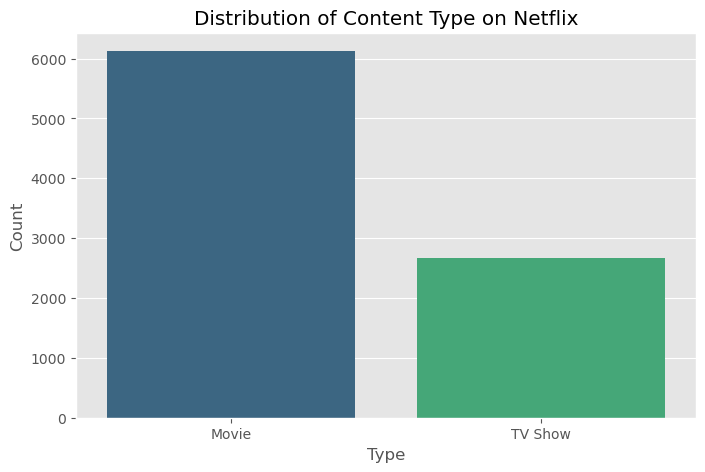

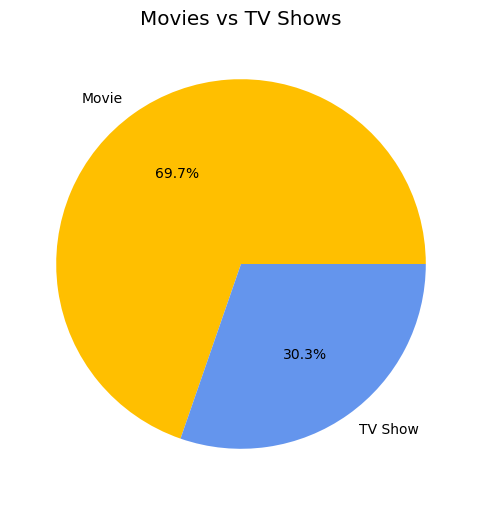

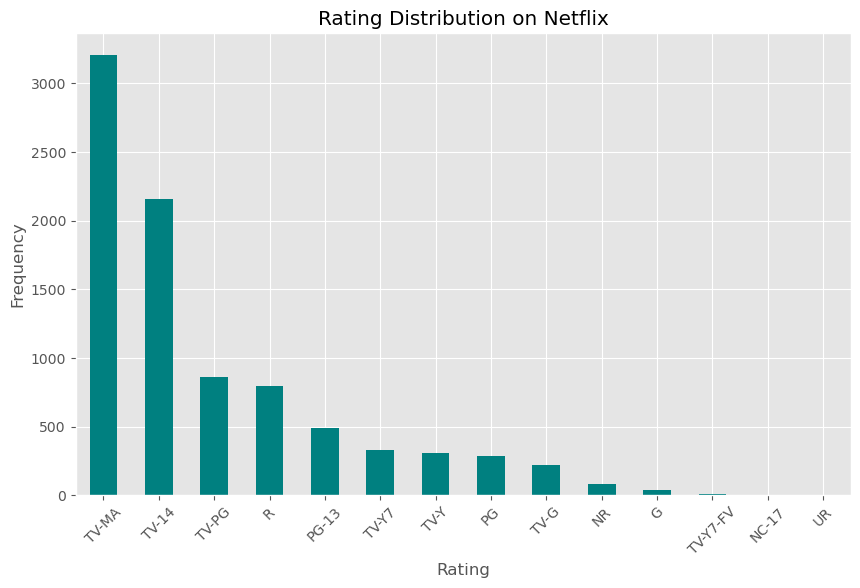

<ipython-input-5-5e9282d633d2>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


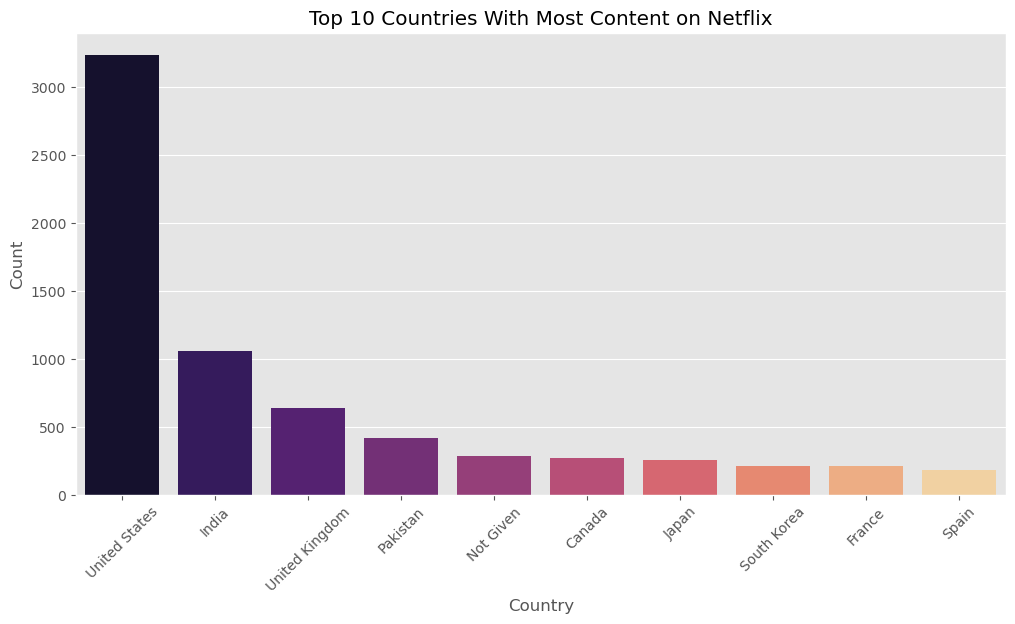

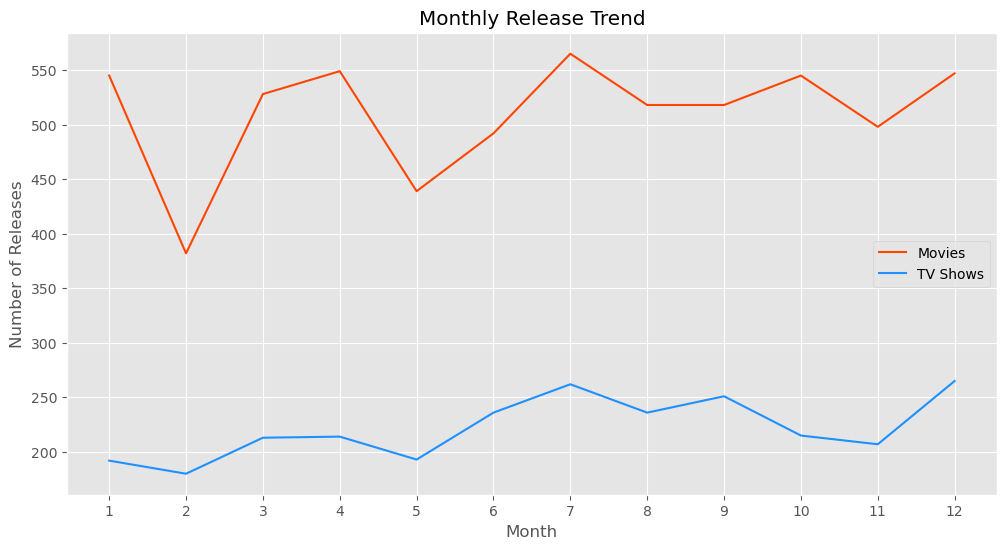

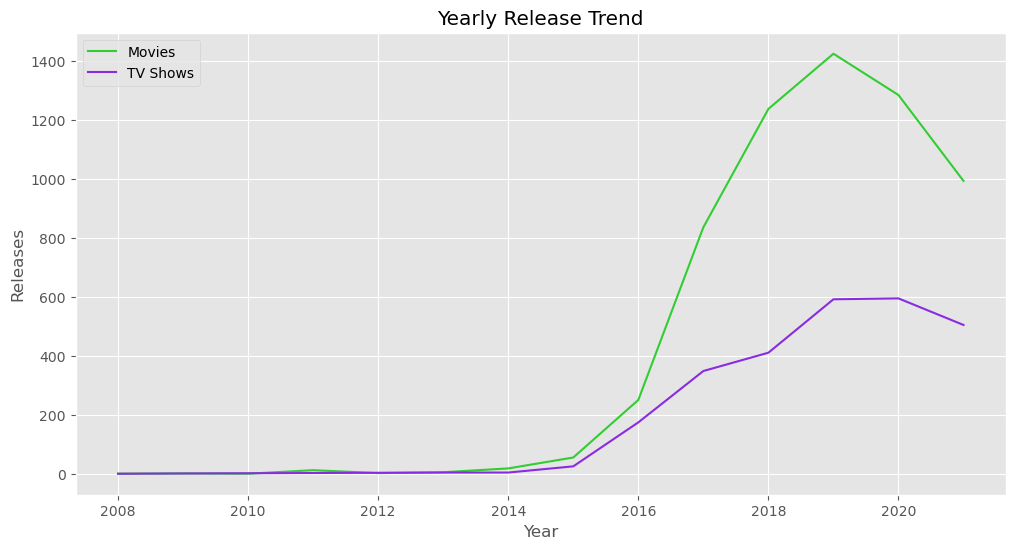

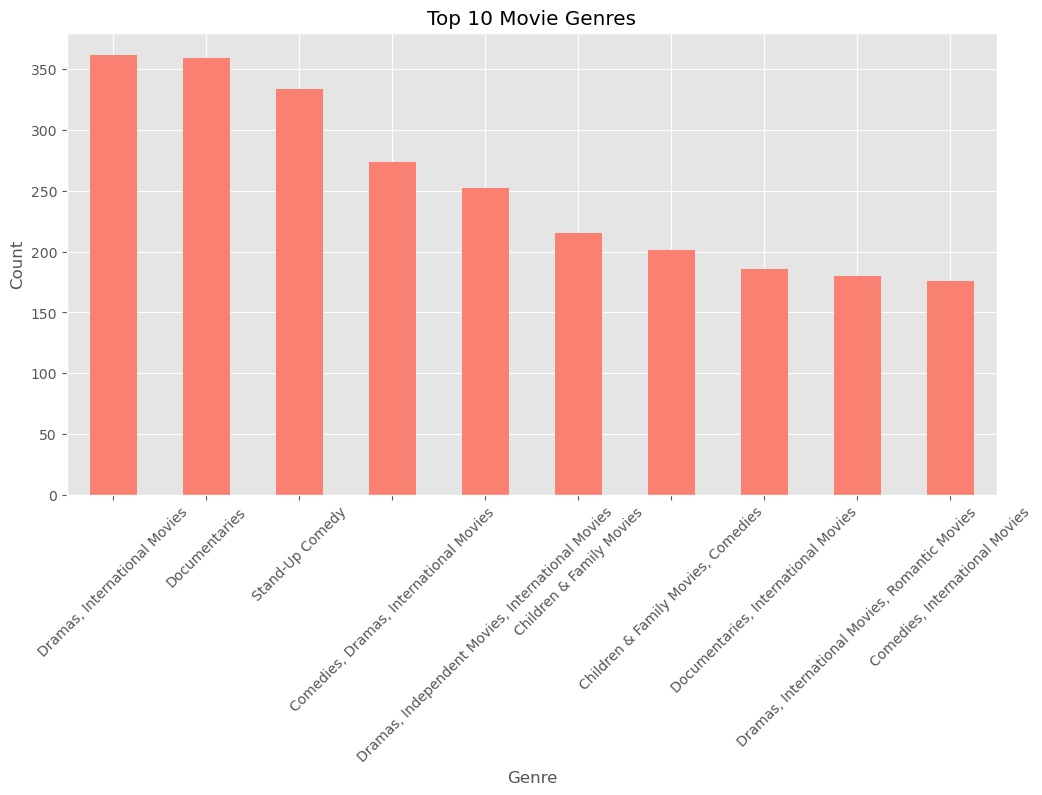

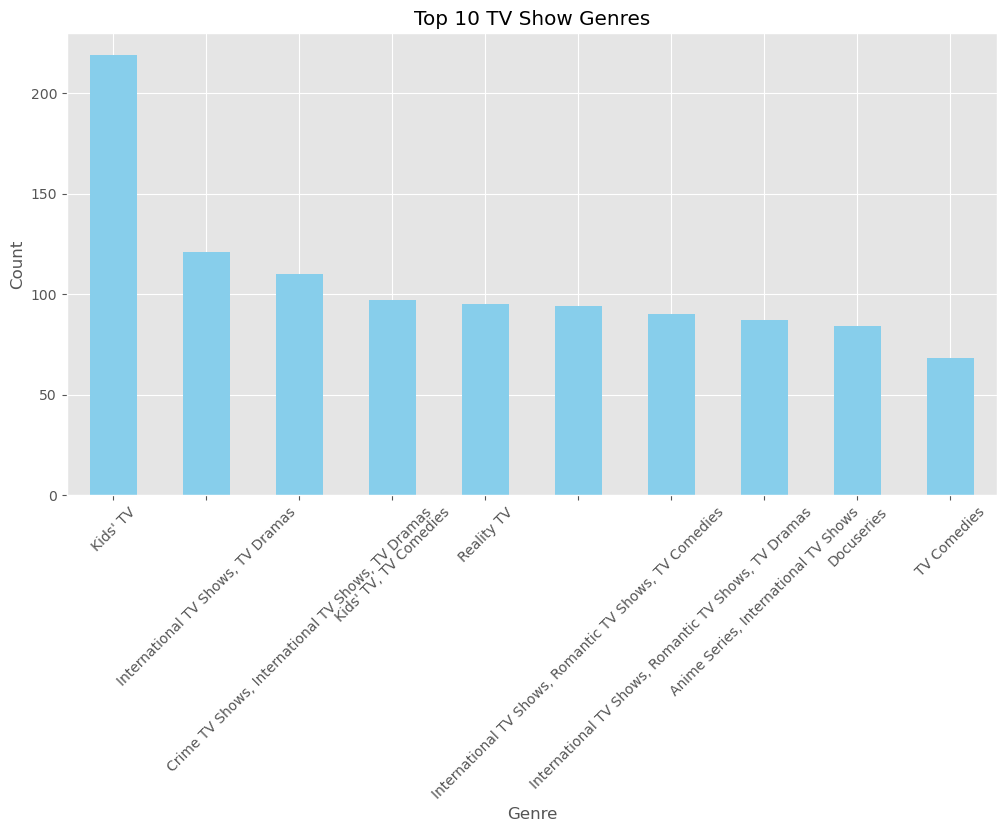

<ipython-input-5-5e9282d633d2>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


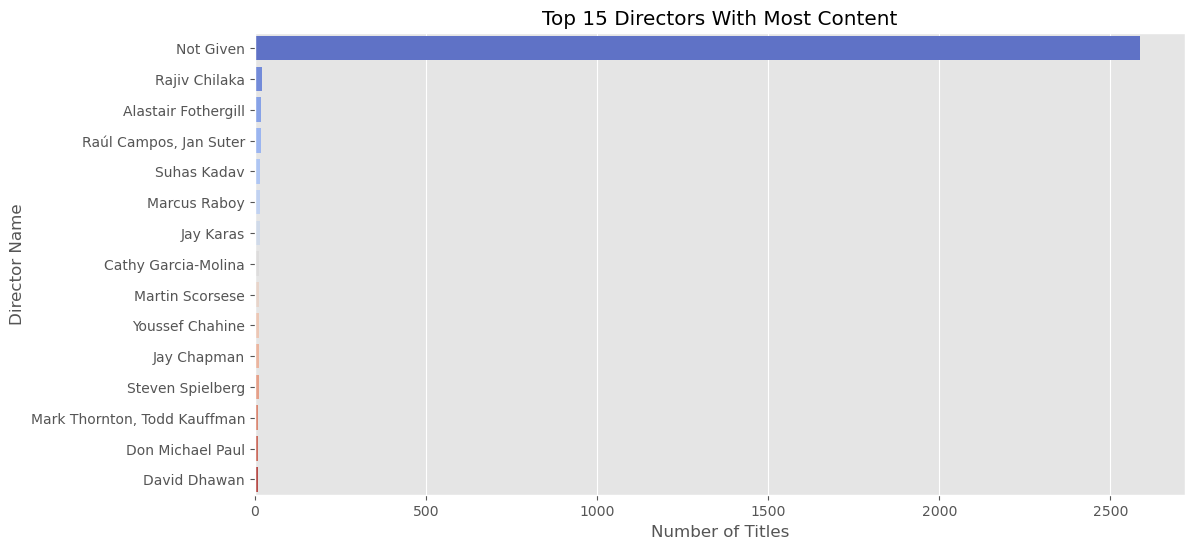

In [5]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
data = pd.read_csv("netflix1.csv")
print("Dataset Loaded Successfully\n")
print(data.head())
print("\nBasic Info:")
print(data.info())
data = data.drop_duplicates()
data['country'] = data['country'].replace('', 'Not Given')
data['director'] = data['director'].replace('', 'Not Given')
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day
print("\nAfter cleaning:")
print(data.info())
plt.figure(figsize=(8,5))
sns.countplot(x=data['type'], palette="viridis")  
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
type_counts = data['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    type_counts, 
    labels=type_counts.index, 
    autopct='%1.1f%%',
    colors=['#FFBF00', '#6495ED']   
)
plt.title("Movies vs TV Shows")
plt.show()
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='teal')  
plt.title("Rating Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma") 
plt.title("Top 10 Countries With Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
monthly_movies = data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_shows = data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_movies.index, monthly_movies.values, label="Movies", color="#FF4500")  
plt.plot(monthly_shows.index, monthly_shows.values, label="TV Shows", color="#1E90FF")  
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Release Trend")
plt.legend()
plt.grid(True)
plt.show()
yearly_movies = data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_shows = data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(yearly_movies.index, yearly_movies.values, label="Movies", color="#32CD32")  
plt.plot(yearly_shows.index, yearly_shows.values, label="TV Shows", color="#8A2BE2")  
plt.xlabel("Year")
plt.ylabel("Releases")
plt.title("Yearly Release Trend")
plt.legend()
plt.grid(True)
plt.show()
movie_genres = data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
movie_genres.plot(kind='bar', color='salmon')  
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
tv_genres = data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
tv_genres.plot(kind='bar', color='skyblue')  
plt.title("Top 10 TV Show Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
top_directors = data['director'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")  
plt.title("Top 15 Directors With Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Director Name")
plt.show()
